<center> <h1> Preception Task 2 </h1> </center>

### Import all libraries

In [129]:
%matplotlib inline # To show plots in jupyter directly 
import cv2 as cv # to perform our image processing
import numpy as np # to handle images in the form of arrays 
import matplotlib.pyplot as plt # to plot images relative to RGB

UsageError: unrecognized arguments: # To show plots in jupyter directly


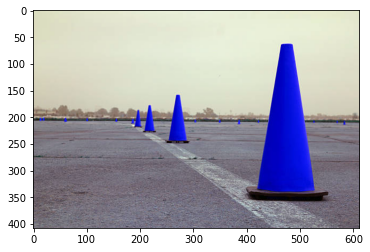

In [130]:
img = cv.imread('test.jpg') # import our test image, N.P. "This algorithm works only for this image, 
# I can make a more general algorithm to detect any cone" 

plt.imshow(img) # Plotting in RGB Domain 

- As cones have a red/orange color which is eye sensitive, we can use convert our BGR image to HSV which converts the image relative to the Human sensitive Eye  
- This Algo works best to detect red/orange objects

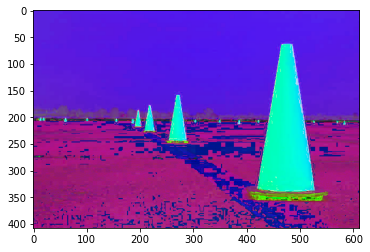

In [131]:
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV) # Convert to HSV Domain
plt.imshow(img_hsv)

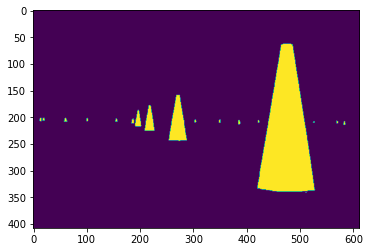

In [132]:
img_thresh_low = cv.inRange(img_hsv, np.array([0, 135, 135]), np.array([20, 255, 255]))  # Get least red/orange objects
img_thresh_high = cv.inRange(img_hsv, np.array([159, 135, 135]), np.array([179, 255, 255])) # Get Highest red/orange objects
img_thresh = cv.bitwise_or(img_thresh_low, img_thresh_high) # Combine them to make sure that we got all the red/orange objects 
plt.imshow(img_thresh)

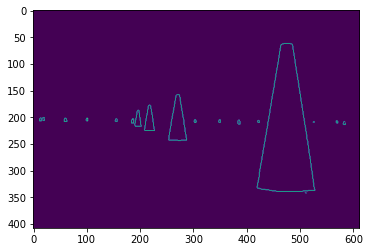

In [133]:
img_edges = cv.Canny(img_thresh, 80,160) # Detect all the Edges
plt.imshow(img_edges)

In [134]:
contours, _ = cv.findContours(img_edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE) # Find all contours

In [127]:
for contour in contours:
    approx = cv.approxPolyDP(contour, 10, closed = True) # Make approx closed line over each contour to get a better result 
    if 3<=approx.shape[0]<=10: # to eliminate the noise of the small cones behind
        cv.drawContours(img, [approx], 0, (255,0,0), 3) # Draw red lines
        x = approx.ravel()[0] 
        y = approx.ravel()[1]
        cv.putText(img, "Polygon", (x,y), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255)) # Put a text over each contour

### Result

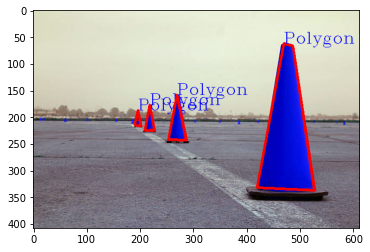

In [128]:
plt.imshow(img)